In [ ]:
import pandas as pd

In [ ]:
# Load datasets
details_df = pd.read_csv("Details.csv")
print(details_df.head())
orders_df = pd.read_csv("Orders.csv")
print(orders_df.head())

  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-25681    1096     658         7  Electronics  Electronic Games   
1  B-26055    5729      64        14    Furniture            Chairs   
2  B-25955    2927     146         8    Furniture         Bookcases   
3  B-26093    2847     712         8  Electronics          Printers   
4  B-25602    2617    1151         4  Electronics            Phones   

   PaymentMode  
0          COD  
1          EMI  
2          EMI  
3  Credit Card  
4  Credit Card  
  Order ID  Order Date CustomerName           State     City
0  B-26055  10-03-2018    Harivansh   Uttar Pradesh  Mathura
1  B-25993  03-02-2018       Madhav           Delhi    Delhi
2  B-25973  24-01-2018  Madan Mohan   Uttar Pradesh  Mathura
3  B-25923  27-12-2018        Gopal     Maharashtra   Mumbai
4  B-25757  21-08-2018     Vishakha  Madhya Pradesh   Indore


In [ ]:
# Merge
merged_df = pd.merge(details_df, orders_df, on="Order ID", how="inner")
print(merged_df.head())

  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-25681    1096     658         7  Electronics  Electronic Games   
1  B-26055    5729      64        14    Furniture            Chairs   
2  B-25955    2927     146         8    Furniture         Bookcases   
3  B-26093    2847     712         8  Electronics          Printers   
4  B-25602    2617    1151         4  Electronics            Phones   

   PaymentMode  Order Date CustomerName           State     City  
0          COD  04-06-2018       Bhawna  Madhya Pradesh   Indore  
1          EMI  10-03-2018    Harivansh   Uttar Pradesh  Mathura  
2          EMI  16-01-2018        Shiva     Maharashtra     Pune  
3  Credit Card  27-03-2018       Sarita     Maharashtra     Pune  
4  Credit Card  01-04-2018       Vrinda     Maharashtra     Pune  


In [ ]:
# Convert 'Order Date'
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], format='%d-%m-%Y')
print(merged_df)

     Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0     B-25681    1096     658         7  Electronics  Electronic Games   
1     B-26055    5729      64        14    Furniture            Chairs   
2     B-25955    2927     146         8    Furniture         Bookcases   
3     B-26093    2847     712         8  Electronics          Printers   
4     B-25602    2617    1151         4  Electronics            Phones   
...       ...     ...     ...       ...          ...               ...   
1495  B-25700       7      -3         2     Clothing       Hankerchief   
1496  B-25757    3151     -35         7     Clothing          Trousers   
1497  B-25973    4141    1698        13  Electronics          Printers   
1498  B-25698       7      -2         1     Clothing       Hankerchief   
1499  B-25993    4363     305         5    Furniture            Tables   

      PaymentMode Order Date CustomerName           State     City  
0             COD 2018-06-04       Bhawna 

In [ ]:
# Save the merged dataset to a CSV file
merged_df.to_csv('merged_output.csv', index=False)

print("Datasets merged successfully and saved to 'merged_output.csv'.")


Datasets merged successfully and saved to 'merged_output.csv'.


In [ ]:
# Compute KPIs
# 1. Total Sales
total_sales = merged_df['Amount'].sum()

In [ ]:
# 2. Average Sales per Region
avg_sales_per_region = merged_df.groupby('State')['Amount'].mean()
# 3. Identifying High-performing and Low-performing Regions
high_performing_region = avg_sales_per_region.idxmax()  # Region with the highest average sales
low_performing_region = avg_sales_per_region.idxmin()

In [ ]:
# 3. Customer Satisfaction Score
customer_satisfaction_score = 85  # Example static value

In [ ]:
# Display results
print(f"Total Sales: ₹{total_sales}")
print("\nAverage Sales per Region:")
print(avg_sales_per_region)
print(f"\nCustomer Satisfaction Score: {customer_satisfaction_score}")
print(f"\nHigh-Performing Region: {high_performing_region} with Average Sales of ₹{avg_sales_per_region[high_performing_region]:.2f}")
print(f"Low-Performing Region: {low_performing_region} with Average Sales of ₹{avg_sales_per_region[low_performing_region]:.2f}")

Total Sales: ₹437771

Average Sales per Region:
State
Andhra Pradesh       315.619048
Bihar                216.403226
Delhi                302.065789
Goa                  155.930233
Gujarat              245.643678
Haryana              340.884615
Himachal Pradesh     298.827586
Jammu and Kashmir    221.000000
Karnataka            250.400000
Kerala               308.244444
Madhya Pradesh       278.544586
Maharashtra          342.802676
Nagaland             266.511111
Punjab               279.766667
Rajasthan            301.810811
Sikkim               219.833333
Tamil Nadu           251.040000
Uttar Pradesh        440.942529
West Bengal          227.428571
Name: Amount, dtype: float64

Customer Satisfaction Score: 85

High-Performing Region: Uttar Pradesh with Average Sales of ₹440.94
Low-Performing Region: Goa with Average Sales of ₹155.93


Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

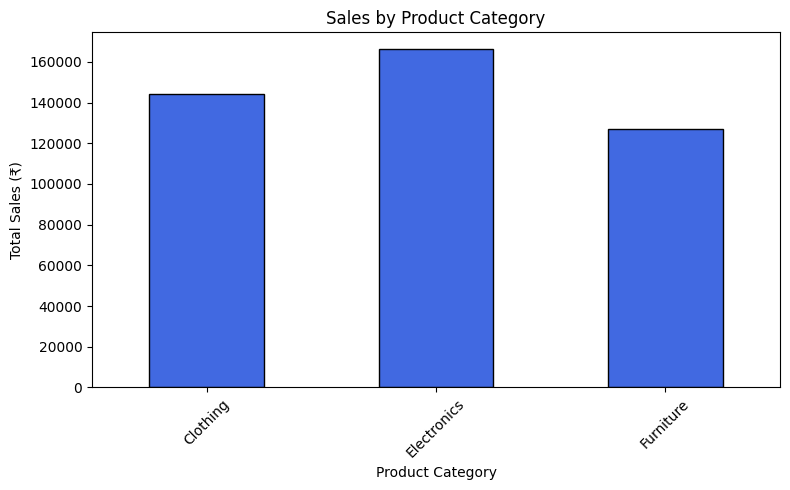

In [ ]:
# Bar Chart: Sales by Product Category
sales_by_category = merged_df.groupby('Category')['Amount'].sum()
plt.figure(figsize=(8, 5))
sales_by_category.plot(kind='bar', color='royalblue', edgecolor='black')
plt.title('Sales by Product Category')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Sales by Product Category
sales_by_category = merged_df.groupby('Category')['Amount'].sum()

# Find the category with highest and lowest sales
highest_sales_category = sales_by_category.idxmax()
highest_sales_value = sales_by_category.max()

lowest_sales_category = sales_by_category.idxmin()
lowest_sales_value = sales_by_category.min()

# Print the results
print(f"Category with Highest Sales: {highest_sales_category} - ₹{highest_sales_value:,.0f}")
print(f"Category with Lowest Sales: {lowest_sales_category} - ₹{lowest_sales_value:,.0f}")


Category with Highest Sales: Electronics - ₹166,267
Category with Lowest Sales: Furniture - ₹127,181


In [ ]:
# Find the month with highest and lowest sales
highest_sales_month = monthly_sales.idxmax()
highest_sales_value = monthly_sales.max()

lowest_sales_month = monthly_sales.idxmin()
lowest_sales_value = monthly_sales.min()

# Convert the period to month name
highest_sales_month_name = pd.to_datetime(highest_sales_month).strftime('%B')
lowest_sales_month_name = pd.to_datetime(lowest_sales_month).strftime('%B')

# Print the results
print(f"Month with Highest Sales: {highest_sales_month_name} - ₹{highest_sales_value:,.0f}")
print(f"Month with Lowest Sales: {lowest_sales_month_name} - ₹{lowest_sales_value:,.0f}")


Month with Highest Sales: January - ₹61,632
Month with Lowest Sales: July - ₹12,966


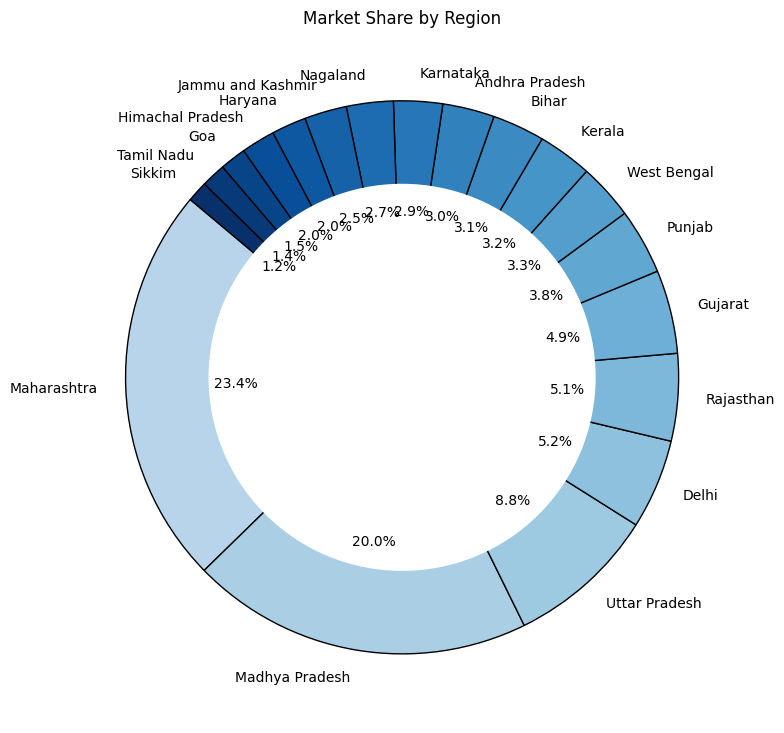

In [ ]:
# Sales by Region (State)
sales_by_region = merged_df.groupby('State')['Amount'].sum()
sorted_sales = sales_by_region.sort_values(ascending=False)
colors = plt.cm.Blues(np.linspace(0.3, 1, len(sorted_sales)))
# Create the Donut chart
plt.figure(figsize=(8, 8))
plt.pie(sorted_sales, labels=sorted_sales.index, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops={'edgecolor': 'black'})
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)
plt.title('Market Share by Region')
plt.tight_layout()
plt.show()


In [ ]:
# Find the region with highest and lowest sales
highest_sales_region = sales_by_region.idxmax()
highest_sales_value = sales_by_region.max()
highest_sales_percentage = (highest_sales_value / sales_by_region.sum()) * 100

lowest_sales_region = sales_by_region.idxmin()
lowest_sales_value = sales_by_region.min()
lowest_sales_percentage = (lowest_sales_value / sales_by_region.sum()) * 100

# Print the results
print(f"Region with Highest Market Share: {highest_sales_region} - ₹{highest_sales_value:,.0f} ({highest_sales_percentage:.1f}%)")
print(f"Region with Lowest Market Share: {lowest_sales_region} - ₹{lowest_sales_value:,.0f} ({lowest_sales_percentage:.1f}%)")


Region with Highest Market Share: Maharashtra - ₹102,498 (23.4%)
Region with Lowest Market Share: Sikkim - ₹5,276 (1.2%)


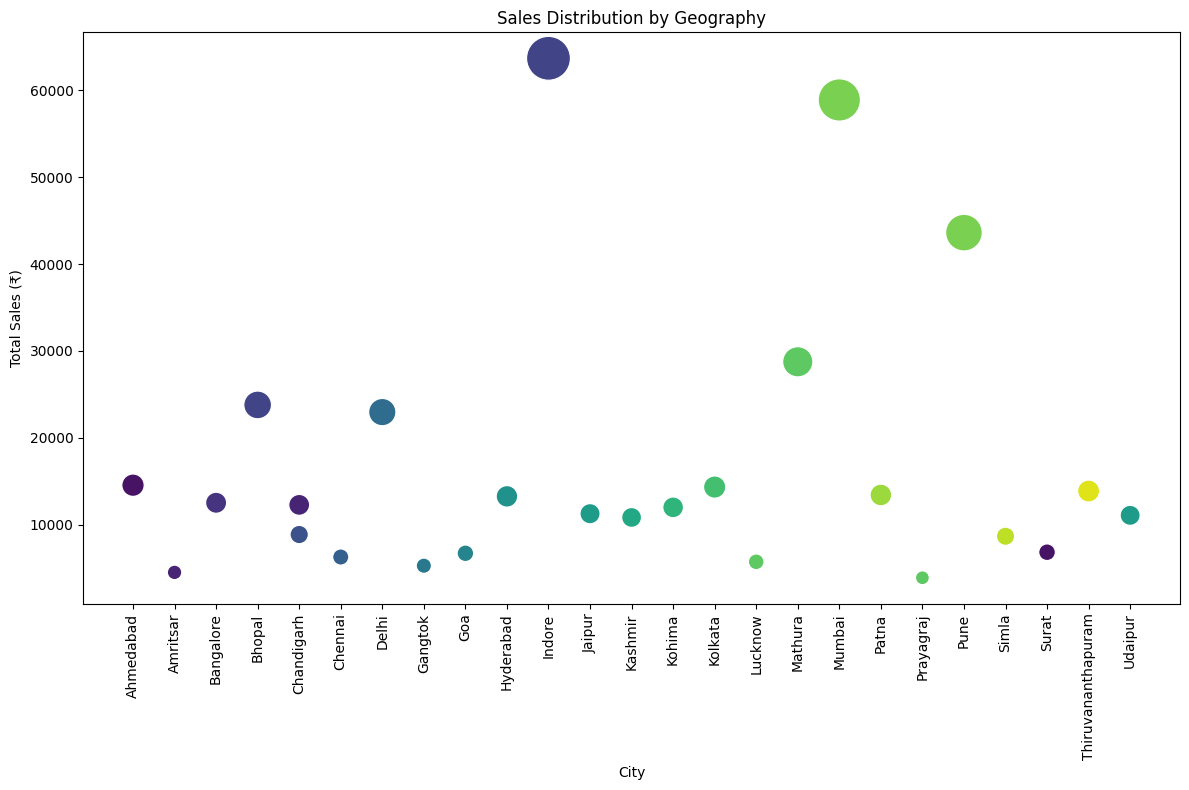

In [ ]:
# Map: Sales Distribution by Geography
sales_by_city = merged_df.groupby(['City', 'State'])['Amount'].sum().reset_index()
sales_by_city.columns = ['City', 'State', 'Total Sales']

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=sales_by_city,
    x='City',
    y='Total Sales',
    size='Total Sales',
    sizes=(100, 1000),
    hue='State',
    legend=False,
    palette='viridis'
)
plt.title('Sales Distribution by Geography')
plt.xlabel('City')
plt.ylabel('Total Sales (₹)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Find the city with the highest and lowest total sales
highest_sales_city = sales_by_city.loc[sales_by_city['Total Sales'].idxmax()]
lowest_sales_city = sales_by_city.loc[sales_by_city['Total Sales'].idxmin()]
# Output the results
print(f"City with Highest Sales: {highest_sales_city['City']} in {highest_sales_city['State']} - ₹{highest_sales_city['Total Sales']:.0f}")
print(f"City with Lowest Sales: {lowest_sales_city['City']} in {lowest_sales_city['State']} - ₹{lowest_sales_city['Total Sales']:.0f}")


City with Highest Sales: Indore in Madhya Pradesh - ₹63680
City with Lowest Sales: Prayagraj in Uttar Pradesh - ₹3889


In [ ]:

import plotly.express as px

# Load the dataset
data = pd.read_csv('merged_output.csv')

# Convert 'Order Date'
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')
fig = px.scatter(
    data,
    x='Order Date',
    y='Amount',
    color='Category',
    hover_data=['Sub-Category', 'City', 'State'],
    title='Sales Data with Filters',
)

fig.update_layout(
    xaxis_title='Order Date',
    yaxis_title='Amount',
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'All Dates',
                    'method': 'relayout',
                    'args': ['xaxis.range', [data['Order Date'].min(), data['Order Date'].max()]]
                },
                {
                    'label': 'Last 6 Months',
                    'method': 'relayout',
                    'args': ['xaxis.range', [data['Order Date'].max() - pd.DateOffset(months=6), data['Order Date'].max()]]
                },
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

fig.show()

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')

# Key insights:
# 1. Total sales and profit by category
category_summary = data.groupby('Category').agg({'Amount': 'sum', 'Profit': 'sum'}).reset_index()

# 2. Top-performing regions (states) by total sales
state_summary = data.groupby('State').agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False).head(5).reset_index()

# 3. Sales trend over time
sales_trend = data.groupby(data['Order Date'].dt.to_period('M')).agg({'Amount': 'sum'}).reset_index()

# Displaying the insights
print("Category Summary:")
print(category_summary)
print("\
Top 5 States by Sales:")
print(state_summary)
print("\
Sales Trend:")
print(sales_trend.head())

Category Summary:
      Category  Amount  Profit
0     Clothing  144323   13325
1  Electronics  166267   13162
2    Furniture  127181   10476
Top 5 States by Sales:
            State  Amount
0     Maharashtra  102498
1  Madhya Pradesh   87463
2   Uttar Pradesh   38362
3           Delhi   22957
4       Rajasthan   22334
Sales Trend:
  Order Date  Amount
0    2018-01   61632
1    2018-02   38962
2    2018-03   60694
3    2018-04   34330
4    2018-05   29093


#Insights and Analysis
###Total Sales:Monitor overall performance and growth.
###Average Sales per Region: Identify high-performing regions and areas needing improvement.
###Customer Satisfaction Score: Track customer feedback and satisfaction levels.
###Sales by Product Category: Determine which product categories are driving sales.
###Monthly Sales Trends: Analyze seasonal trends and sales patterns.
###Market Share by Region: Understand your market position in different regions.
###Sales Distribution by Geography: Visualize geographic sales performance and identify potential markets.


In [ ]:

# Load the datasets
details_df = pd.read_csv("Details.csv")
orders_df = pd.read_csv("Orders.csv")
merged_df = pd.merge(details_df, orders_df, on="Order ID", how="inner")
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], format='%d-%m-%Y')



In [ ]:
# 1. Total Sales
total_sales = merged_df['Amount'].sum()
print(f"Total Sales: ₹{total_sales}")


Total Sales: ₹437771


In [ ]:

# 2. Average Sales per Region
avg_sales_per_region = merged_df.groupby('State')['Amount'].mean()
print("\nAverage Sales per Region:")
print(avg_sales_per_region)



Average Sales per Region:
State
Andhra Pradesh       315.619048
Bihar                216.403226
Delhi                302.065789
Goa                  155.930233
Gujarat              245.643678
Haryana              340.884615
Himachal Pradesh     298.827586
Jammu and Kashmir    221.000000
Karnataka            250.400000
Kerala               308.244444
Madhya Pradesh       278.544586
Maharashtra          342.802676
Nagaland             266.511111
Punjab               279.766667
Rajasthan            301.810811
Sikkim               219.833333
Tamil Nadu           251.040000
Uttar Pradesh        440.942529
West Bengal          227.428571
Name: Amount, dtype: float64


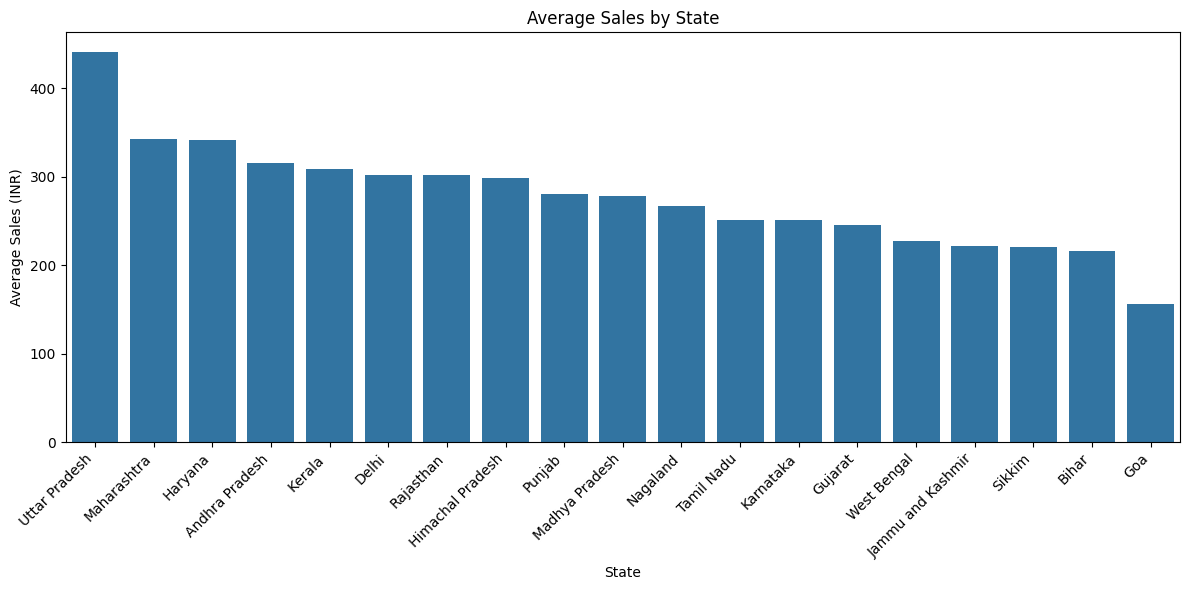

Top 5 States by Average Sales:
                Avg_Sales  Number_of_Orders  Total_Sales
State                                                   
Uttar Pradesh      440.94                87        38362
Maharashtra        342.80               299       102498
Haryana            340.88                26         8863
Andhra Pradesh     315.62                42        13256
Kerala             308.24                45        13871


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('merged_output.csv')

region_performance = df.groupby('State').agg({
    'Amount': ['mean', 'count', 'sum']
}).round(2)

region_performance.columns = ['Avg_Sales', 'Number_of_Orders', 'Total_Sales']
region_performance = region_performance.sort_values('Avg_Sales', ascending=False)

# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=region_performance.reset_index(), x='State', y='Avg_Sales')
plt.xticks(rotation=45, ha='right')
plt.title('Average Sales by State')
plt.xlabel('State')
plt.ylabel('Average Sales (INR)')
plt.tight_layout()
plt.show()

print("\
Top 5 States by Average Sales:")
print(region_performance.head().round(2))

In [ ]:

# 3. Customer Satisfaction Score (Placeholder)
customer_satisfaction_score = 85
print(f"\nCustomer Satisfaction Score: {customer_satisfaction_score}")



Customer Satisfaction Score: 85


<ipython-input-88-ddb4cae927a8>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




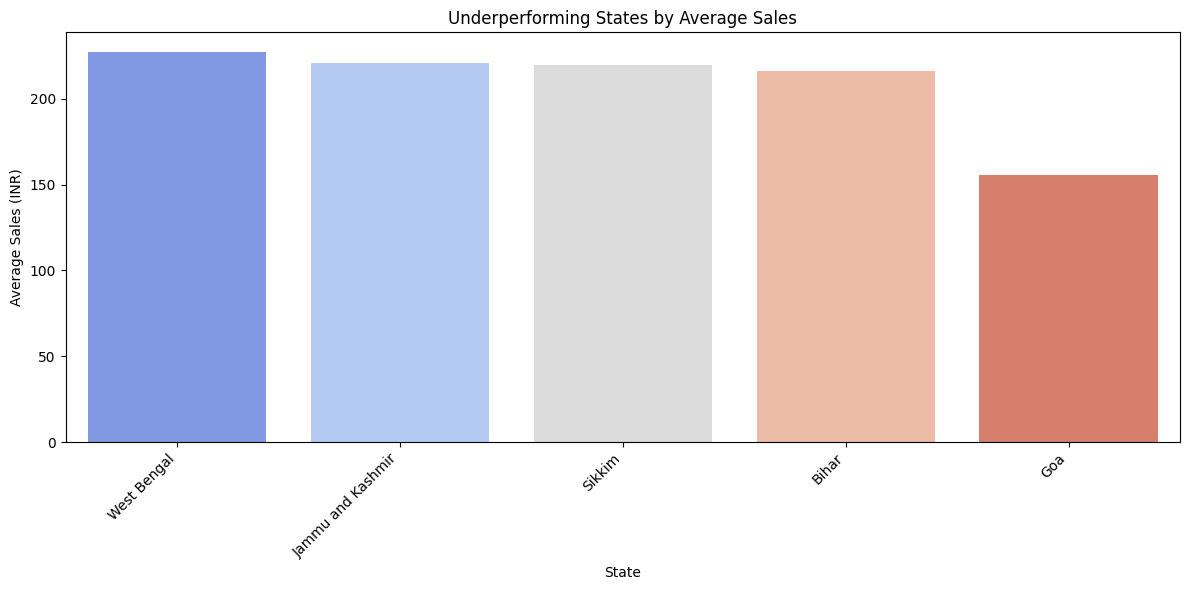

Bottom 5 States by Average Sales:
                   Avg_Sales  Number_of_Orders  Total_Sales
State                                                      
West Bengal           227.43                63        14328
Jammu and Kashmir     221.00                49        10829
Sikkim                219.83                24         5276
Bihar                 216.40                62        13417
Goa                   155.93                43         6705


In [ ]:

low_performance = region_performance.tail(5)

plt.figure(figsize=(12, 6))
sns.barplot(data=low_performance.reset_index(), x='State', y='Avg_Sales', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Underperforming States by Average Sales')
plt.xlabel('State')
plt.ylabel('Average Sales (INR)')
plt.tight_layout()
plt.show()

print("\
Bottom 5 States by Average Sales:")
print(low_performance.round(2))

<ipython-input-89-083aa44fa09d>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




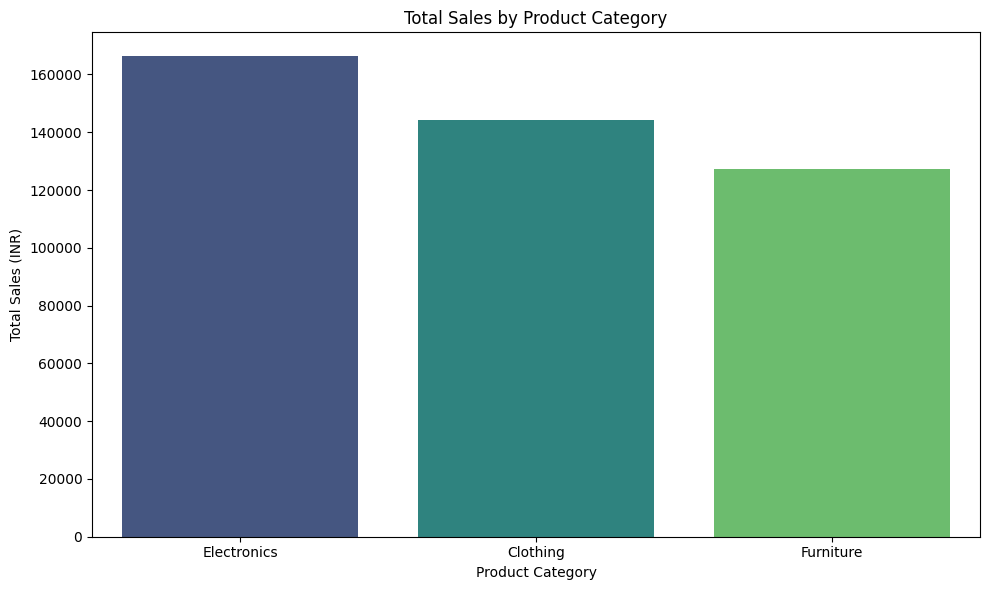

Sales by Product Category:
      Category  Amount
0  Electronics  166267
1     Clothing  144323
2    Furniture  127181


In [ ]:

category_sales = df.groupby('Category').agg({'Amount': 'sum'}).sort_values('Amount', ascending=False)

category_sales = category_sales.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Category', y='Amount', palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (INR)')
plt.tight_layout()
plt.show()

print("\
Sales by Product Category:")
print(category_sales)

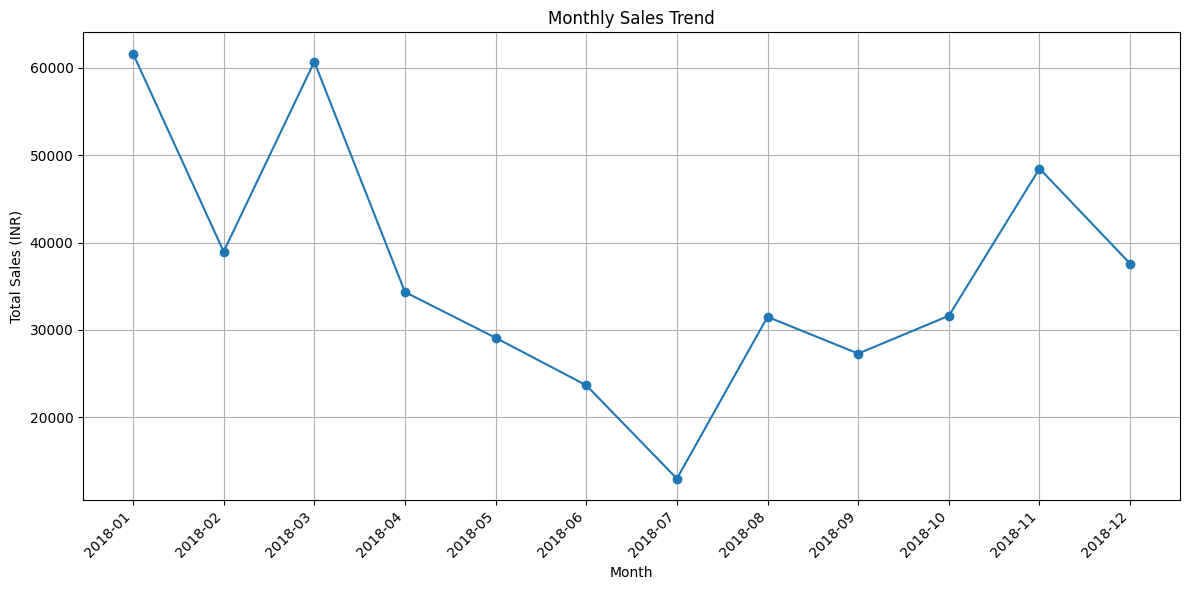

Peak Sales Months:
   Month_Year  Amount
0     2018-01   61632
2     2018-03   60694
10    2018-11   48469


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

# Extract month and year
df['Month_Year'] = df['Order Date'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = df.groupby('Month_Year').agg({
    'Amount': 'sum',
    'Order ID': 'count'
}).reset_index()

monthly_sales['Month_Year'] = monthly_sales['Month_Year'].astype(str)

# Create visualization
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month_Year'], monthly_sales['Amount'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\
Peak Sales Months:")
print(monthly_sales.nlargest(3, 'Amount')[['Month_Year', 'Amount']])

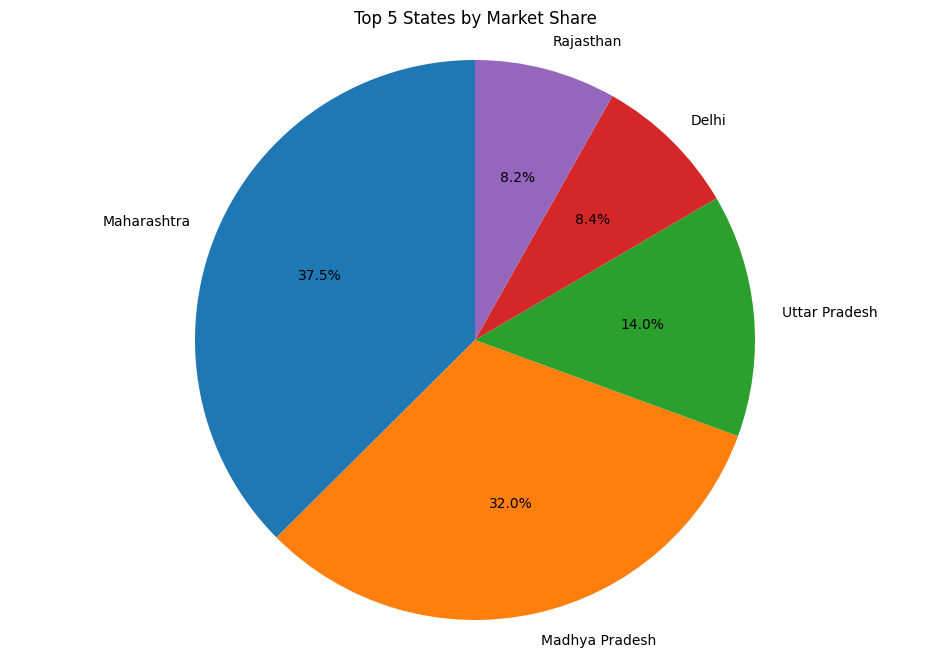

Detailed State Analysis:
             State  Amount  Market_Share
11     Maharashtra  102498     23.413611
10  Madhya Pradesh   87463     19.979167
17   Uttar Pradesh   38362      8.763029
2            Delhi   22957      5.244066
14       Rajasthan   22334      5.101754


In [ ]:
# Analyzing sales by region (State)
state_analysis = df.groupby('State').agg({
    'Amount': 'sum',
    'Order ID': 'count'
}).reset_index()

# Calculate market share percentage
state_analysis['Market_Share'] = (state_analysis['Amount'] / state_analysis['Amount'].sum()) * 100

# Sort by market share
state_analysis = state_analysis.sort_values('Market_Share', ascending=False)

# Create pie chart for top states
plt.figure(figsize=(12, 8))
plt.pie(state_analysis['Market_Share'][:5],
        labels=state_analysis['State'][:5],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Top 5 States by Market Share')
plt.axis('equal')
plt.show()

print("\
Detailed State Analysis:")
print(state_analysis[['State', 'Amount', 'Market_Share']].head())

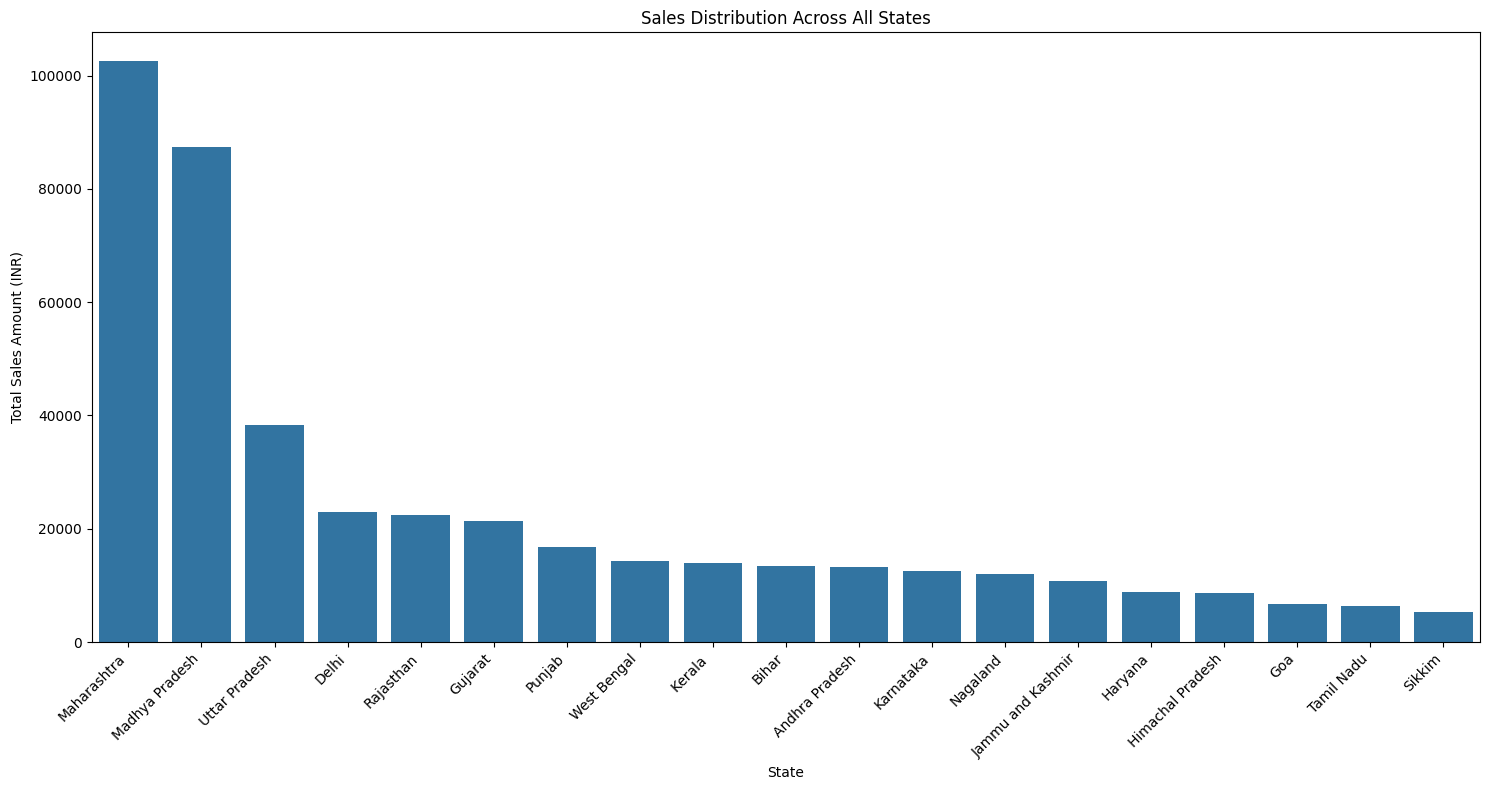

Complete State-wise Performance:
                State  Amount  Order ID  Avg_Order_Value
11        Maharashtra  102498       299       342.802676
10     Madhya Pradesh   87463       314       278.544586
17      Uttar Pradesh   38362        87       440.942529
2               Delhi   22957        76       302.065789
14          Rajasthan   22334        74       301.810811
4             Gujarat   21371        87       245.643678
13             Punjab   16786        60       279.766667
18        West Bengal   14328        63       227.428571
9             Kerala    13871        45       308.244444
1               Bihar   13417        62       216.403226
0      Andhra Pradesh   13256        42       315.619048
8           Karnataka   12520        50       250.400000
12           Nagaland   11993        45       266.511111
7   Jammu and Kashmir   10829        49       221.000000
5             Haryana    8863        26       340.884615
6    Himachal Pradesh    8666        29       298.82758

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot with state names
plt.figure(figsize=(15, 8))
sns.barplot(data=geo_analysis.sort_values('Amount', ascending=False),
            x='State',
            y='Amount')
plt.xticks(rotation=45, ha='right')
plt.title('Sales Distribution Across All States')
plt.xlabel('State')
plt.ylabel('Total Sales Amount (INR)')
plt.tight_layout()
plt.show()

# Print detailed metrics for all states
print("\
Complete State-wise Performance:")
print(geo_analysis.sort_values('Amount', ascending=False)[['State', 'Amount', 'Order ID', 'Avg_Order_Value']])